In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Modelos entrenados con 8 variables sin PCA

## Carga de datos

Se cargan los datos procesados previamente desde el fichero pickle en un dataframe y se determina su tamaño

In [2]:
datos = pd.read_pickle('Datos_descarga_proc_2023-04-27_100935.pickle')
datos.shape

(116185, 9)

In [3]:
datos.head()

,flujo_htf_bypass_tgv,flujo_vol_htf_frio,temp_sal_fria,temp_sal_caliente,temp_amb,vel_viento,temp_bul_hum,ratio_flujo_mas_sal_htf,eficiencia_descarga
time,,,,,,,,,
2017-01-16 17:53:00,0.718579,0.724740,0.414023,0.466736,0.236307,0.076024,0.349321,0.214858,0.306006
2017-01-16 17:54:00,0.721303,0.725735,0.417832,0.466921,0.234101,0.052742,0.345422,0.214461,0.307990
2017-01-16 17:55:00,0.531299,0.728362,0.421326,0.467107,0.233188,0.059869,0.342715,0.212301,0.312124
2017-01-16 17:56:00,0.622601,0.727113,0.424370,0.466983,0.236989,0.042289,0.342245,0.213734,0.314885
2017-01-16 17:57:00,0.711855,0.728163,0.428013,0.467354,0.241164,0.021382,0.344345,0.214263,0.317008


<AxesSubplot:xlabel='time', ylabel='eficiencia_descarga'>

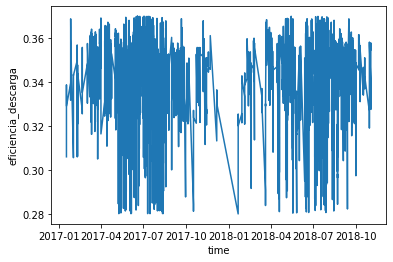

In [4]:
sns.lineplot(data=datos, x=datos.index, y="eficiencia_descarga")

Antes de poder entrenar los modelos, se divide el dataset en datos de entrenamiento y de validación.

In [5]:
filas_entrenamiento = int(len(datos)*0.8)
datos_entrenamiento = datos[:filas_entrenamiento]
datos_validacion = datos[filas_entrenamiento:]

X = datos.drop('eficiencia_descarga', axis=1)
X_ent = datos_entrenamiento.drop('eficiencia_descarga', axis=1)
y_ent = datos_entrenamiento['eficiencia_descarga']
X_val = datos_validacion.drop('eficiencia_descarga', axis=1)
y_val = datos_validacion['eficiencia_descarga']

In [6]:
datos_entrenamiento.tail()

,flujo_htf_bypass_tgv,flujo_vol_htf_frio,temp_sal_fria,temp_sal_caliente,temp_amb,vel_viento,temp_bul_hum,ratio_flujo_mas_sal_htf,eficiencia_descarga
time,,,,,,,,,
2018-07-17 20:34:00,0.658752,0.357655,0.265409,0.870329,0.678486,0.537509,0.646195,0.184339,0.335641
2018-07-17 20:35:00,0.684624,0.354899,0.264859,0.870081,0.678806,0.526217,0.647096,0.191250,0.331968
2018-07-17 20:36:00,0.699457,0.360054,0.264676,0.869849,0.679943,0.548913,0.648210,0.188757,0.331791
2018-07-17 20:37:00,0.678390,0.362013,0.264926,0.869787,0.679379,0.506512,0.647887,0.189304,0.331201
2018-07-17 20:38:00,0.654038,0.361688,0.263745,0.869633,0.678360,0.507379,0.646816,0.192726,0.329223


In [7]:
datos_validacion

,flujo_htf_bypass_tgv,flujo_vol_htf_frio,temp_sal_fria,temp_sal_caliente,temp_amb,vel_viento,temp_bul_hum,ratio_flujo_mas_sal_htf,eficiencia_descarga
time,,,,,,,,,
2018-07-17 20:39:00,0.668371,0.363001,0.263678,0.869710,0.678049,0.529963,0.646873,0.187630,0.334118
2018-07-17 20:40:00,0.667795,0.362621,0.262813,0.869586,0.678061,0.502627,0.647689,0.187991,0.335187
2018-07-17 20:41:00,0.696415,0.366697,0.261549,0.869896,0.677207,0.498728,0.647136,0.187393,0.334209
2018-07-17 20:42:00,0.713421,0.366067,0.260351,0.870344,0.677001,0.461107,0.647281,0.186157,0.336157
2018-07-17 20:43:00,0.682528,0.367055,0.259237,0.870081,0.676416,0.504402,0.647374,0.185783,0.336533
...,...,...,...,...,...,...,...,...,...
2018-11-01 19:12:00,0.615575,0.778326,0.523164,0.651526,0.261126,0.073649,0.488894,0.212138,0.355668
2018-11-01 19:13:00,0.617011,0.778449,0.523164,0.651232,0.261206,0.123302,0.489089,0.212054,0.354810
2018-11-01 19:14:00,0.614643,0.778730,0.522616,0.650691,0.262178,0.118509,0.490413,0.212859,0.354186


## Media

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Cálculo de la media de y_ent
media = np.mean(y_ent)

print("Media eficiencia: {:2f}%".format(media*100))

# Predicciones en el conjunto de validación y en el dataset total
predicciones_media = np.full(len(y_val), media)
datos['eficiencia_descarga_media'] = media

# Métricas de evaluación
mse_media = mean_squared_error(y_val, predicciones_media)
rmse_media = np.sqrt(mse_media)
r2_media = r2_score(y_val, predicciones_media)

print("Métricas de evaluación para el modelo de la media:")
print("RMSE: {:2f}%".format(rmse_media*100))
print("R2: ", r2_media)

Media eficiencia: 34.121352%
Métricas de evaluación para el modelo de la media:
RMSE: 1.238113%
R2:  -0.007822904882182957


## Regresión Lineal

In [13]:
from sklearn.linear_model import LinearRegression

# Creación y entrenamiento del modelo de Regresión Lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_ent, y_ent)

# Predicciones en el conjunto de validación y en el dataset total
predicciones_regresion_lineal = modelo_regresion_lineal.predict(X_val)
datos['eficiencia_descarga_rl'] = modelo_regresion_lineal.predict(X)

# Métricas de evaluación
mse_regresion_lineal = mean_squared_error(y_val, predicciones_regresion_lineal)
rmse_regresion_lineal = np.sqrt(mse_regresion_lineal)
r2_regresion_lineal = r2_score(y_val, predicciones_regresion_lineal)

print("Métricas de evaluación para el modelo de Regresión Lineal:")
print("RMSE: {:2f}%".format(rmse_regresion_lineal*100))
print("R2: ", r2_regresion_lineal)


Métricas de evaluación para el modelo de Regresión Lineal:
MSE:  7.053218688557263e-05
RMSE: 0.839834%
R2:  0.5362854872405849


## Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
    
RF_regressor = RandomForestRegressor()

param = {'bootstrap': [True, False],
        'max_depth': [10, 30, 50, 70, 90, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [400, 800, 1200, 1600, 2000]}

grid = RandomizedSearchCV(estimator= RF_regressor, param_distributions= param, n_iter= 100, cv= 5, random_state= 1, n_jobs= -1)

grid_fit = grid.fit(X = X_ent, y = y_ent)

In [16]:
mejor_rf = grid_fit.best_estimator_
print(mejor_rf)

# Predicciones en los datos de validación
predicciones_rf = mejor_rf.predict(X_val)
datos['eficiencia_descarga_rf'] = mejor_rf.predict(X)

# Métricas de evaluación
mse_rf = mean_squared_error(y_val, predicciones_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, predicciones_rf)

print("Métricas de evaluación para el modelo de Random Forest Regressor:")
print("RMSE: {:2f}%".format(rmse_rf*100))
print("R2: ", r2_rf)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
Métricas de evaluación para el modelo de Random Forest Regressor:
MSE:  5.6189658358844715e-05
RMSE: 0.749598%
R2:  0.6305805732316032


## Support Vector Regression (SVR)

In [17]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Posibles valores de hiperparámetros a probar
parametros_svr = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 'scale', 'auto'], 'epsilon': [0.01, 0.1, 0.2]}

# Búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_svr = GridSearchCV(estimator=SVR(), param_grid= parametros_svr, cv=5, n_jobs= -1)
grid_svr_fit = grid.fit(X = X_ent, y = y_ent)
modelo_svr = grid_svr_fit.best_estimator_

# Predicciones en los datos de validación
predicciones_svr = modelo_svr.predict(X_val)
datos['eficiencia_descarga_svr'] = modelo_svr.predict(X)

# Métricas de evaluación
mse_svr = mean_squared_error(y_val, predicciones_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_val, predicciones_svr)

print("Métricas de evaluación para el modelo de Support Vector Regression :")
print("RMSE: {:2f}%".format(rmse_svr*100))
print("R2: ", r2_svr)

Métricas de evaluación para el modelo de Support Vector Regression :
MSE:  5.67406790980994e-05
RMSE: 0.753264%
R2:  0.6269578823027319


## AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostRegressor

# Posibles valores de hiperparámetros a probar
parametros_ada = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]}

# Búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_ada = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=parametros_ada, cv=5, n_jobs=-1)
grid_ada_fit = grid.fit(X = X_ent, y = y_ent)
modelo_ada = grid_ada_fit.best_estimator_

# Predicciones en los datos de validación
predicciones_ada = modelo_ada.predict(X_val)
datos['eficiencia_descarga_ada'] = modelo_ada.predict(X)

# Métricas de evaluación
mse_ada = mean_squared_error(y_val, predicciones_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_val, predicciones_ada)

print("Métricas de evaluación para el modelo de AdaBoost :")
print("RMSE: {:2f}%".format(rmse_ada*100))
print("R2: ", r2_ada)

Métricas de evaluación para el modelo de AdaBoost :
MSE:  5.621956355707977e-05
RMSE: 0.749797%
R2:  0.6303839612301769


## Bagging Regressor

In [9]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Posibles valores de hiperparámetros para la búsqueda aleatoria
parametros_bagging = {'n_estimators': [10, 50, 100], 
                      'max_samples': [0.5, 1.0], 
                      'max_features': [0.5, 1.0]}

parametros_random = {'base_estimator': [DecisionTreeRegressor(), 
                                        RandomForestRegressor(), 
                                        ExtraTreesRegressor()],
                     'n_estimators': randint(10, 500),
                     'max_samples': [0.5, 1.0],
                     'max_features': [0.5, 1.0],
                     'bootstrap': [True, False],
                     'bootstrap_features': [True, False],
                     'warm_start': [True, False],
                     'base_estimator__max_depth': randint(1, 20),
                     'base_estimator__min_samples_split': randint(2, 20),
                     'base_estimator__min_samples_leaf': randint(1, 20)}

# Búsqueda aleatoria con validación cruzada para encontrar los mejores hiperparámetros
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
random_bagging = RandomizedSearchCV(estimator=bagging_regressor, param_distributions=parametros_random, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_bagging_fit = random_bagging.fit(X_ent, y_ent)
modelo_bagging = random_bagging_fit.best_estimator_

# Predicciones en los datos de validación
predicciones_bagging = modelo_bagging.predict(X_val)
datos['eficiencia_descarga_bagging'] = modelo_bagging.predict(X)

# Métricas de evaluación
mse_bagging = mean_squared_error(y_val, predicciones_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_val, predicciones_bagging)

print("Métricas de evaluación para el modelo de Bagging Regressor optimizado:")
print("RMSE: {:2f}%".format(rmse_bagging*100))
print("R2: ", r2_bagging)

c:\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py

Métricas de evaluación para el modelo de Bagging Regressor optimizado:
MSE:  6.0021935736433475e-05
RMSE: 0.774738%
R2:  0.6053852302913575


In [11]:
modelo_bagging

BaggingRegressor(base_estimator=ExtraTreesRegressor(max_depth=17,
                                                    min_samples_leaf=14,
                                                    min_samples_split=6),
                 bootstrap=False, n_estimators=441, random_state=42,
                 warm_start=True)

## Comparativa

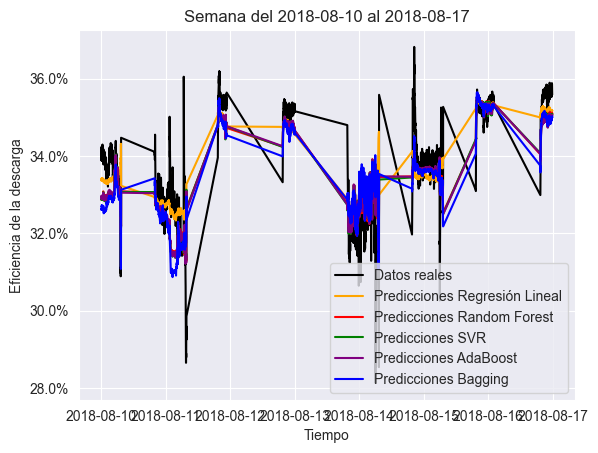

In [25]:
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Convertir fecha_inicio a tipo datetime
fecha_inicio = datetime.strptime('2017-07-17', '%Y-%m-%d')

# Calcular fecha_fin como 7 días después de fecha_inicio
fecha_fin = fecha_inicio + timedelta(days=7)

# Filtrar datos dentro del rango de fechas
datos_semana = datos.loc[fecha_inicio:fecha_fin]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, ax1 = plt.subplots()

# Datos reales
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga", color='black', label='Datos reales')

# Predicciones
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_media", color='grey', label='Predicciones Regresión Lineal')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_rl", color='orange', label='Predicciones Regresión Lineal')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_rf", color='red', label='Predicciones Random Forest')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_svr", color='green', label='Predicciones SVR')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_ada", color='purple', label='Predicciones AdaBoost')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_bagging", color='blue', label='Predicciones Bagging')

ax1.set_ylabel('Eficiencia de la descarga')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax1.set_xlabel('Tiempo')
ax1.set_title('Semana del ' + fecha_inicio.strftime('%Y-%m-%d') + ' al ' + fecha_fin.strftime('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator())  # Establecer la frecuencia del eje x a diario
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha en el eje x
ax1.legend()

plt.show()